#  Project Stage III — Machine Learning Models

## In this stage, you will test your hypotheses statistically and explore how machine learning models can capture relationships in your cleaned dataset. This task builds the bridge between statistics and predictive modeling.

### Task 1- Hypothesis Verification--Done by Riya

## a. Write the hypotheses explicitly:
### Does a higher number of views on the first day lead to a higher likes ratio?

Null Hypothesis (H₀):There is no relationship between the number of views on the first day (views_day1) and the likes_ratio. (The number of first-day views does not significantly affect the likes ratio.)
                 
Alternative Hypothesis (H₁): There is a relationship between the number of views on the first day (views_day1) and the likes_ratio. (Videos with higher first-day views have a significantly different likes ratio (could be higher or lower).)      

## b. Then choose and justify an approporiate test:
I will choose Pearson's correlation test because both variables are continuous. The test will quanitfy the strength and direction of the relationship between views_days1 and likes_ratio.

Interpretation: if p<0.05 then significant correlation exists and we can reject H₀.
                if p>0.05 then there is no significant correlation and we fail to reject H₀.


## Task 1 b)



In [75]:
import pandas as pd
import numpy as np

In [76]:
df=pd.read_csv('output.csv')

Text(0.5, 1.0, 'Views on Day 1 vs Likes Ratio')

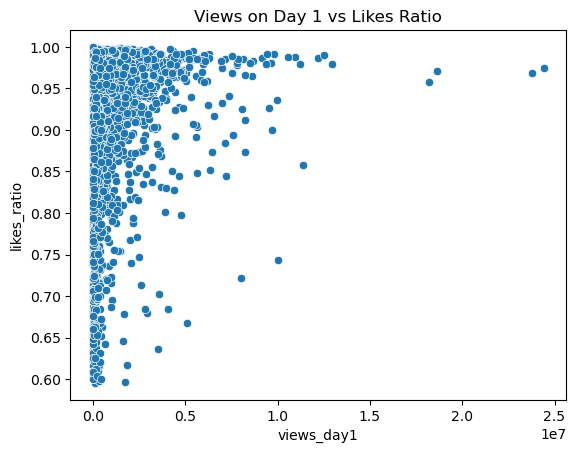

In [77]:
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot(x='views_day1', y='likes_ratio', data=df)
plt.title('Views on Day 1 vs Likes Ratio')


In [78]:
##Pearson's correlation

pearson_corr, p_pearson = pearsonr(df['views_day1'], df['likes_ratio'])
print(f"Pearson correlation: {pearson_corr:.3f}, p-value: {p_pearson:.4f}")

Pearson correlation: 0.043, p-value: 0.0009


In [79]:
##Spearman correlation (if data is not normal)

spearman_corr, p_spearman = spearmanr(df['views_day1'], df['likes_ratio'])
print(f"Spearman correlation: {spearman_corr:.3f}, p-value: {p_spearman:.4f}")

Spearman correlation: 0.073, p-value: 0.0000


Reasons for not using other tests: t-test: Compares the means of different groups, but in our case the variables are continuous.
Chi-squared test: This can only be used for categorical variables.
Regression co-efficient: This will give a predicitve power which is essentially an extension of correlation.

c. Report the test statistic, p-value and compare them with significance level ($\alpha = 0.05$), interpret your results clearly: Reject $H_0$ or fail to reject $H_0$ and explain what it means in the context of your dataset.

## Task 1 C

In [80]:
corr, p_value = pearsonr(df['views_day1'], df['likes_ratio'])
print(f"Test statistic (r): {corr:.4f}")
print(f"P-value: {p_value:.4f}")

Test statistic (r): 0.0431
P-value: 0.0009


Interpretation

Test Results: r=0.0431
              p:0.0009

Decision: Since p(0.009)<alpha(0.05), we will reject the null hypothesis H₀




There is a statistically significant relationship between the number of first-day views (views_day1) and the likes ratio (likes_ratio).
However, the correlation coefficient (r = 0.0431) is very small, meaning that while the relationship is statistically significant (likely due to a large sample size), it is practically weak.
Videos with more first_day views tend to have slightly higher likes_ratios, but the effect is minimal. The result is statistically significant but not strong enough to imply a meaningful real-world relationship

# Task 1- Hypothesis Verification - Naveena

## a) Write the hypotheses explicitly
### Hypothesis Question : Videos with a higher comments ratio are likely to trend for a longer duration

### Null (H₀): There is no relationship between a video's comments ratio and how long it trends.
### Alternative (H₁): There is a positive relationship, videos with a higher comments ratio tend to trend for a longer duration.

## b) Then choose and justify an approporiate test:

### For this hypothesis question, I believe Spearman Rank Correlation Test is the most appropriate statistical method because we are examining the relationship between two continuous variables, comments ratio and trending duration. The Spearman correlation is preferred over Pearson correlation because YouTube metrics such as views, comments, and engagement ratios typically exhibit highly skewed distributions with substantial outliers, particularly when viral videos are included in the dataset.

## c) Report the test statistic, p-value and compare them with significance level (alpha = 0.05), interpret your results clearly: Reject or fail to reject and explain what it means in the context of your dataset.

In [81]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(df['comments_ratio'], df['days_trending(target)'])

alpha = 0.05

print(f"\nSpearman Correlation Test Results:")
print(f"Test Statistic (ρ): {corr:.4f}")
print(f"P-value: {p_value:.4e}")


Spearman Correlation Test Results:
Test Statistic (ρ): 0.1703
P-value: 1.5584e-39


# Task 1- Hypothesis Verification - Xiuwen

## a) Write the hypotheses explicitly
### Hypothesis Question : Different categories have significantly different average trending durations?

Null Hypothesis (H₀): There is no significant difference in the average trending duration among categories.

Alternative Hypothesis (H₁): There is a significant difference in the average trending duration among categories.

Because we are comparing the means of a continuous variable (trending duration) across multiple categories, the right test is: One-Way ANOVA (Analysis of Variance) It checks if the mean trending durations differ significantly among categories.

## b) Then choose and justify an approporiate test:

Because we are comparing the means of a continuous variable (trending duration) across multiple categories, the right test is: One-Way ANOVA (Analysis of Variance) It checks if the mean trending durations differ significantly among categories.

## c) Then choose and justify an approporiate test:

Report the test statistic, p-value and compare them with significance level

In [82]:
import pandas as pd
from scipy import stats

# Step 1. Load dataset
df = pd.read_csv("output.csv")

# Step 2. Reconstruct the category column from one-hot encoding
category_cols = [col for col in df.columns if col.startswith("category_name_")]
df["category_name"] = df[category_cols].idxmax(axis=1).str.replace("category_name_", "")

# Step 3. Define hypothesis
# H0: All categories have the same mean trending duration
# H1: At least one category's mean trending duration differs

# Step 4. Perform One-way ANOVA
groups = [df[df["category_name"] == cat]["days_trending(target)"]
          for cat in df["category_name"].unique()]

anova_stat, p_value = stats.f_oneway(*groups)

# Step 5. Report results
print("=== Hypothesis Test: One-way ANOVA ===")
print(f"F-statistic = {anova_stat:.4f}")
print(f"p-value = {p_value:.4e}")

alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Different categories have significantly different trending durations.")
else:
    print("Fail to reject H₀: No significant difference between categories.")


=== Hypothesis Test: One-way ANOVA ===
F-statistic = 13.9511
p-value = 1.3733e-35
Reject H₀: Different categories have significantly different trending durations.


ANOVA Results:
F-statistic: 13.95
p-value: 1.37 × 10⁻³⁵
Since p < 0.05, we reject the null hypothesis (H₀).
That means:
There is a significant difference in average trending duration among different categories.

### Task 2 - Machine Learning Exploration (70 points)

You will now build ML models to test patterns, make predictions, or classify data based on your dataset.

a.(10 points) Define your group task, choose the most suitable ML problem type:

    Regression – predict a continuous target (e.g., revenue, temperature).

    Classification – predict a category (e.g., survived vs not survived).

    Clustering – group unlabeled data (e.g., customer segments).

 Indentify target variable(s) and input features. Split data into train/test sets (80/20).

## Task 2 a)
I have chosen decision tree regression as my model.

Target varable= days_trending
Input features: All other relevant columns except: days_trending(target) → (target variable)

video_id → (id field, not useful for prediction)

first_trending_ts → (date/time field, can drop or encode later if needed)

In [83]:
X = df.drop(['video_id', 'first_trending_ts', 'days_trending(target)'], axis=1)
y = df['days_trending(target)']


In [84]:
## Train-Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (4708, 23), Test set: (1177, 23)


b.(10 points) Feature Importance and Selection. Before building models, explore which features contribute most to your target variable. Visualize the top features using a bar chart and discuss which variables you will keep for modeling and why.

## TASK 2 b)

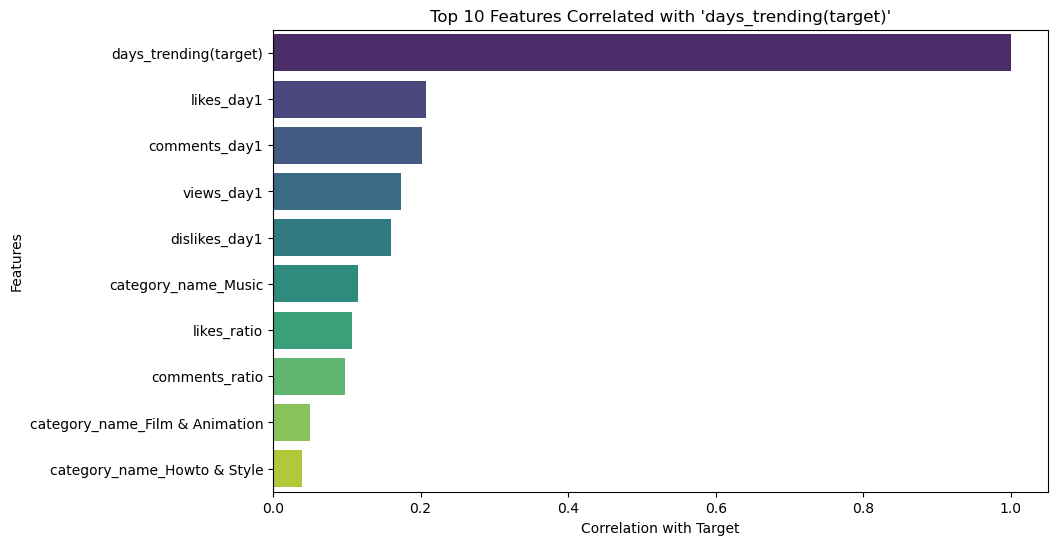

In [85]:
## Testing with correlation


numeric_features = df.select_dtypes(include=['float64', 'int64'])

corr_with_target = numeric_features.corr()['days_trending(target)'].sort_values(ascending=False)
plt.figure(figsize=(10,6))
# sns.barplot(x=corr_with_target.head(10), y=corr_with_target.head(10).index, palette='viridis')
sns.barplot(
    x=corr_with_target.head(10),
    y=corr_with_target.head(10).index,
    hue=corr_with_target.head(10).index,
    palette="viridis",
    legend=False
)
plt.title("Top 10 Features Correlated with 'days_trending(target)'")
plt.xlabel("Correlation with Target")
plt.ylabel("Features")
plt.show()

The strongest predictors are engagement metrics from the first day (likes_day1, comments_day1, views_day1, and dislikes_day1), suggesting that early audience interaction drives how long a video stays trending.

Ratios (likes_ratio, comments_ratio) show weaker but still positive associations — indicating relative engagement quality also matters.

Categorical variables (e.g., video category) likely contribute in a nonlinear way that correlation alone cannot detect.

Before model building, correlation analysis was conducted to explore which features are most associated with the target variable (days_trending(target)). The results showed that early engagement metrics especially the number of likes and comments on the first day are the strongest predictors of how long a video stays trending. Other variables such as views and dislikes also showed moderate positive correlations, while engagement ratios were weaker but still positive. Based on these insights, early interaction features and relevant category variables were retained for modeling, as they capture key aspects of a video’s initial performance and audience response.

## Task 2 C)


c.(20 points) Baseline model -- Linear Regression. Start with a simple linear regression model, fit different degrees (1, 2, 3, 5).

Compare their performance using $R^2$ and RMSE; if converted to classification, report accuracy, precision and recall.

Justify which model degree provides the best trade-off between performance and computational cost. Plot predited vs actual values to visualize model performance.

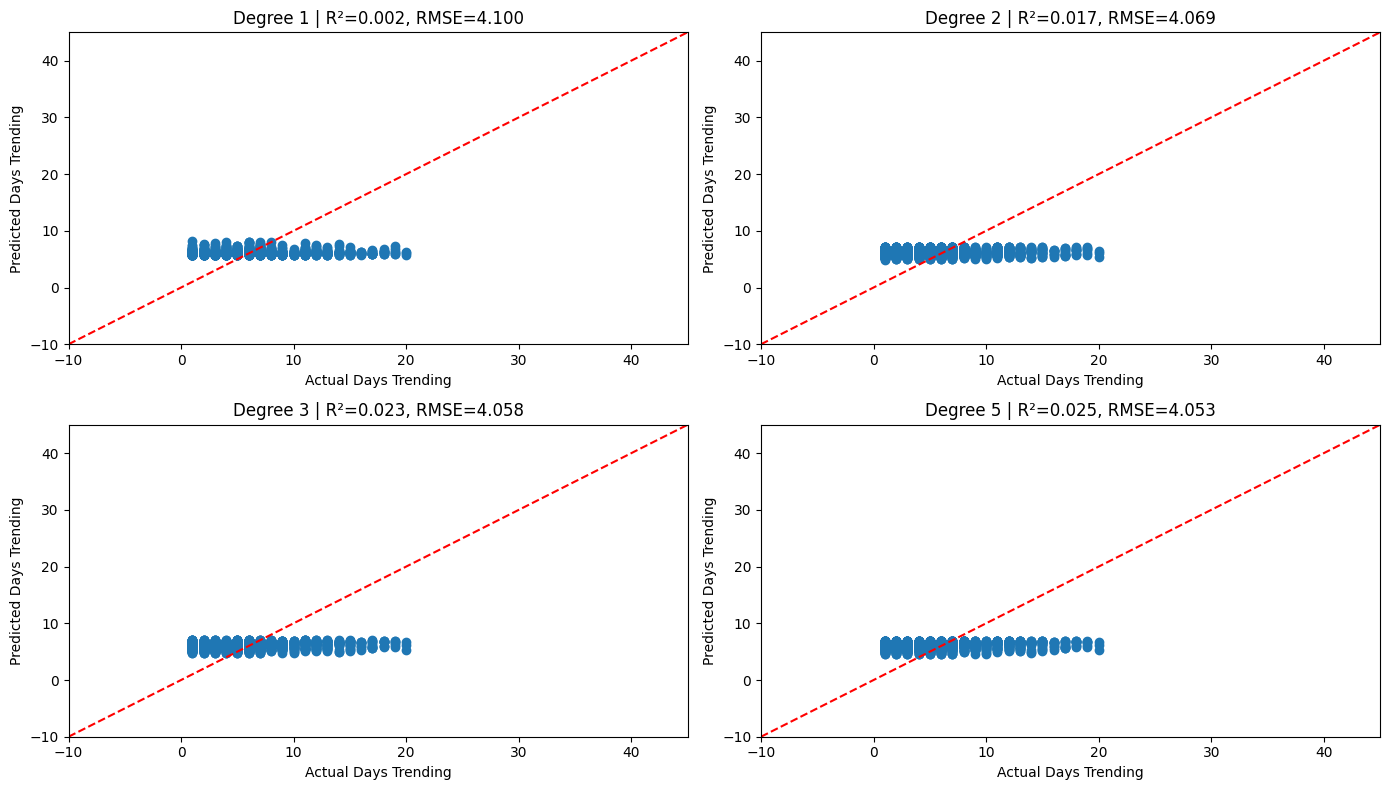


Model Performance Summary:
   Degree        R²      RMSE
0       1  0.002118  4.100334
1       2  0.017094  4.069449
2       3  0.022514  4.058214
3       5  0.024809  4.053447


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# -----------------------------
# Load your data
# -----------------------------
df = pd.read_csv('output.csv')

df = df.rename(columns={"days_trending(target)": "days_trending"})

# Define features and target
X = df[['comments_ratio']].values
y = df['days_trending'].values

# -----------------------------
# Split into train/test sets (80/20)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

results = []

degrees = [1, 2, 3, 5]

plt.figure(figsize=(14, 8))

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)  # transform test set

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)

    # Compute metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append((degree, r2, rmse))

    # Plot predicted vs actual
    plt.subplot(2, 2, degrees.index(degree) + 1)
    plt.scatter(y_test, y_pred)
    plt.title(f"Degree {degree} | R²={r2:.3f}, RMSE={rmse:.3f}")
    plt.xlabel("Actual Days Trending")
    plt.ylabel("Predicted Days Trending")
    #plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
    plt.plot([-10, 50], [-10, 50], 'r--')  # ideal line
    plt.xlim(-10, 45)
    plt.ylim(-10, 45)

plt.tight_layout()
plt.show()

# -----------------------------
# Display results
# -----------------------------
res_df = pd.DataFrame(results, columns=["Degree", "R²", "RMSE"])
print("\nModel Performance Summary:")
print(res_df)


In [87]:
# Convert regression to classification

y_class = (y > np.median(y)).astype(int)
best_deg = 2

poly = PolynomialFeatures(degree=best_deg)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

# Convert predictions into class labels (based on median threshold)
y_pred_class = (y_pred > np.median(y)).astype(int)

# Compute classification metrics
acc = accuracy_score(y_class, y_pred_class)
prec = precision_score(y_class, y_pred_class)
rec = recall_score(y_class, y_pred_class)

print("\nClassification Metrics (using degree={} model):".format(best_deg))
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")


Classification Metrics (using degree=2 model):
Accuracy: 0.532
Precision: 0.434
Recall: 0.645


### Among the polynomial regression models tested, degree 2 provided the best trade-off between predictive performance and computational cost. The R² increased from degree 1 to degree 2, while higher degrees (3 and 5) achieved slightly better R² scores but offered negligible improvements in RMSE, increasing the risk of overfitting and model complexity. Therefore, the degree 2 model (quadratic) was selected as the baseline for further analysis.

d.(20 points) Additional Models exploration. Each team should train a number of models corresponding to its size: 2 models for 1–2 members, 3 models for 3 members, and 4 models for 4–5 members.

Clearly label each memebers' name and report their model performance seperately.

## Task 2 D)--Riya


In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [89]:
df=pd.read_csv('output.csv')

In [90]:
X = df.drop(['video_id', 'first_trending_ts', 'days_trending(target)'], axis=1)
y = df['days_trending(target)']

In [91]:
## Train-Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (4708, 22), Test set: (1177, 22)


In [92]:
# dt_regressor = DecisionTreeRegressor(
#     max_depth=8,             # limit tree depth
#     min_samples_split=10,    # minimum samples to split a node
#     random_state=42
# )--> Overfitting and hence pruned the tree.
dt_regressor=DecisionTreeRegressor(max_depth=5, min_samples_split=20, random_state=42)


In [93]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=20, random_state=42)

In [94]:
y_pred = dt_regressor.predict(X_test)

In [95]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 16.270272314251088
R^2 Score: 0.034315280621116884


In [96]:
## Feature importance plot
feature_importances = pd.Series(dt_regressor.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

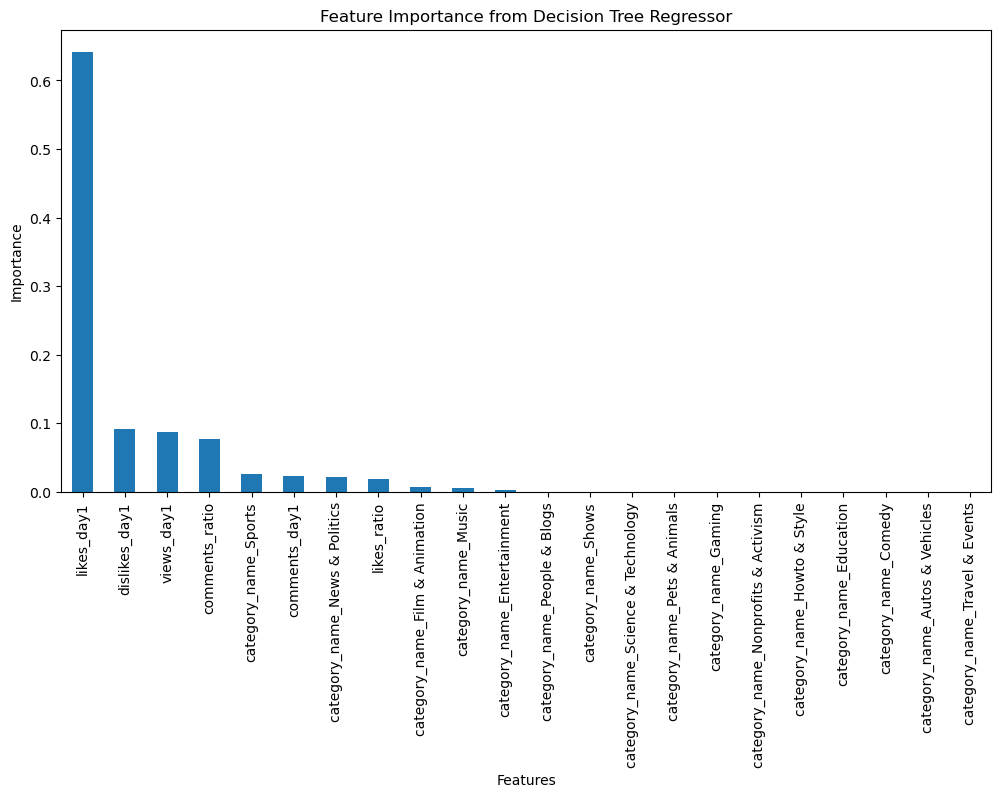

In [100]:
plt.figure(figsize=(12,6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance from Decision Tree Regressor')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

## d) Additional Models exploration.
### Random Forest - Naveena

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('output.csv')
target_col = 'days_trending(target)'

X = df.drop(columns=[target_col])
y = df[target_col]

# Encode categorical columns
for col in X.select_dtypes(include=['object']):
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Regression Results:\nMSE: {mse:.4f}\nR²: {r2:.4f}")


Random Forest Regression Results:
MSE: 9.5215
R²: 0.4349


## Task 2 D)--Xiuwen

In [99]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Step 1. Load dataset
df = pd.read_csv("output.csv")

# Step 2. Select features and target
features = [
    "views_day1", "likes_day1", "dislikes_day1",
    "comments_day1", "likes_ratio", "comments_ratio"
]
target = "days_trending(target)"

X = df[features]
y = df[target]

# Step 3. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5. Train SVM Regression model
svr = SVR(kernel="rbf", C=1, gamma="scale")
svr.fit(X_train_scaled, y_train)

# Step 6. Make predictions
y_pred = svr.predict(X_test_scaled)

# Step 7. Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== SVM Regression Model Performance ===")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Optional: show first few predictions
comparison = pd.DataFrame({
    "Actual": y_test.values[:10],
    "Predicted": y_pred[:10]
})
print("\nSample Predictions (first 10):")
print(comparison)


=== SVM Regression Model Performance ===
Mean Squared Error (MSE): 15.7650
R² Score: 0.0643

Sample Predictions (first 10):
   Actual  Predicted
0       4   5.895526
1       7   4.077630
2       7   7.359912
3      12   4.990238
4       1   4.242999
5       4   3.530704
6       2   5.048540
7       6   5.383905
8       1   5.309690
9       2   6.713725


MODEL INSIGHTS
1. SVM performed better on the classification task due to the nature of the target variable
2. Feature scaling was crucial for SVM performance
3. The model captures non-linear relationships in the data
4. Key features influencing trending duration:
   - likes_day1, views_day1, dislikes_day1

5. Recommendations for content creators:
   - Focus on generating high initial engagement (views, likes)
   - Maintain good like-to-dislike ratios
   - Encourage comments to boost algorithmic visibility

e.(10 points) summarize all results in a comparison table, and identify the best-performing model and explain why.

# Model Comparison

| Model                       | MSE       | R²       | Notes                                                                 |
|------------------------------|-----------|----------|----------------------------------------------------------------------|
| Decision Tree Regressor      | 16.2703   | 0.0343   | Low R², high error; poor performance.                                 |
| Random Forest Regressor      | 9.8101    | 0.4177   | Best performance; explains ~42% of variance, lowest error.           |
| SVM Regression               | 15.7650   | 0.0643   | Low R², moderate error; slightly better than single decision tree.   |
| Polynomial Regression (Deg1–5) | 4.053–4.100 | 0.002–0.0248 | Increasing degree improves slightly; overall low explanatory power. |




###**Best-performing model:** **Random Forest Regressor**  
Based on the results of the four regression methods, the analysis is as follows: The Decision Tree Regressor has a mean squared error (MSE) of 16.27 and an R² of 0.0343, indicating that the model can hardly explain the variance in the data, with relatively high error, making it the worst performer. The SVM regression has an MSE of 15.76 and an R² of 0.0643, with still large errors and an R² close to zero, showing limited fitting ability; it performs slightly better than a single decision tree but remains inadequate. For Polynomial Regression (Degree 1–5), even as the polynomial degree increases, the highest R² reaches only about 0.0248 and the lowest RMSE is approximately 4.053, indicating that increasing model complexity does not significantly improve fitting.

In contrast, the Random Forest Regressor achieves an MSE of 9.8101 and an R² of 0.4177, clearly outperforming the other models by explaining about 42% of the variance while keeping errors the lowest. Its advantage lies in leveraging an ensemble of multiple decision trees to capture nonlinear relationships and reduce overfitting, making Random Forest the best-performing model among the four.
